# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


/opt/anaconda3/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Part 2: Implement SVD for Dimensionality Reduction

In [3]:
def apply_svd_custom(X_train, X_test, n_components):
    tol = 1e-10
    XtX = np.dot(X_train.T, X_train)
    eigenvalues, V = np.linalg.eigh(XtX)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    V = V[:, sorted_indices]

    eigenvalues[eigenvalues < tol] = 0.0
    singular_values = np.sqrt(eigenvalues)

    rank = np.sum(singular_values > tol)
    singular_values = singular_values[:rank]
    V = V[:, :rank]

    U = np.dot(X_train, V)
    for i in range(rank):
        U[:,i] /= singular_values[i]

    Vt = V.T

    U_reduced = U[:, :n_components]
    S_reduced = np.diag(singular_values[:n_components])
    Vt_reduced = Vt[:n_components, :]

    X_train_reduced = np.dot(U_reduced, S_reduced)
    X_test_reduced = np.dot(X_test, Vt_reduced.T)

    return X_train_reduced, X_test_reduced, S_reduced, Vt

## Part 3: Train Logistic Regression and Measure Performance

In [4]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [5]:
# svd_components = [784]  # You need to decide what number to search...
# svd_components = [1, 5, 10, 15, 20, 35, 50, 60, 75, 90, 100, 200, 500]
svd_components = [1, 2, 5, 10, 20, 30, 40, 50, 60]

# Store the results
results = []
accuracies = []
training_times = []
Vt_dict = {}


print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, S_reduced, Vt = apply_svd_custom(X_train,X_test,n_components)
    Vt_dict[n_components] = Vt
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

    accuracies.append(accuracy)
    training_times.append(training_time)



Training models with different levels of SVD preprocessing...
Applying custom SVD with 1 components...
SVD components: 1, Accuracy: 0.1988, Training time: 0.3706 seconds
Applying custom SVD with 2 components...
SVD components: 2, Accuracy: 0.3424, Training time: 0.4559 seconds
Applying custom SVD with 5 components...
SVD components: 5, Accuracy: 0.6659, Training time: 0.6413 seconds
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8020, Training time: 1.1867 seconds
Applying custom SVD with 20 components...
SVD components: 20, Accuracy: 0.8779, Training time: 1.4738 seconds
Applying custom SVD with 30 components...
SVD components: 30, Accuracy: 0.8924, Training time: 4.3095 seconds
Applying custom SVD with 40 components...
SVD components: 40, Accuracy: 0.9024, Training time: 6.2631 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9085, Training time: 14.3870 seconds
Applying custom SVD with 60 components...
SVD components: 60, A

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


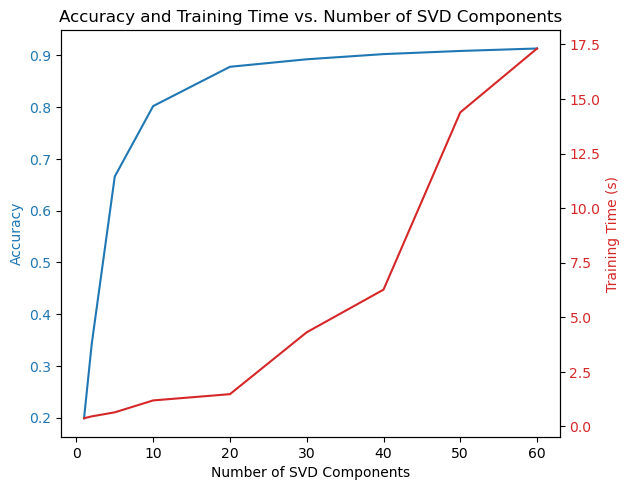

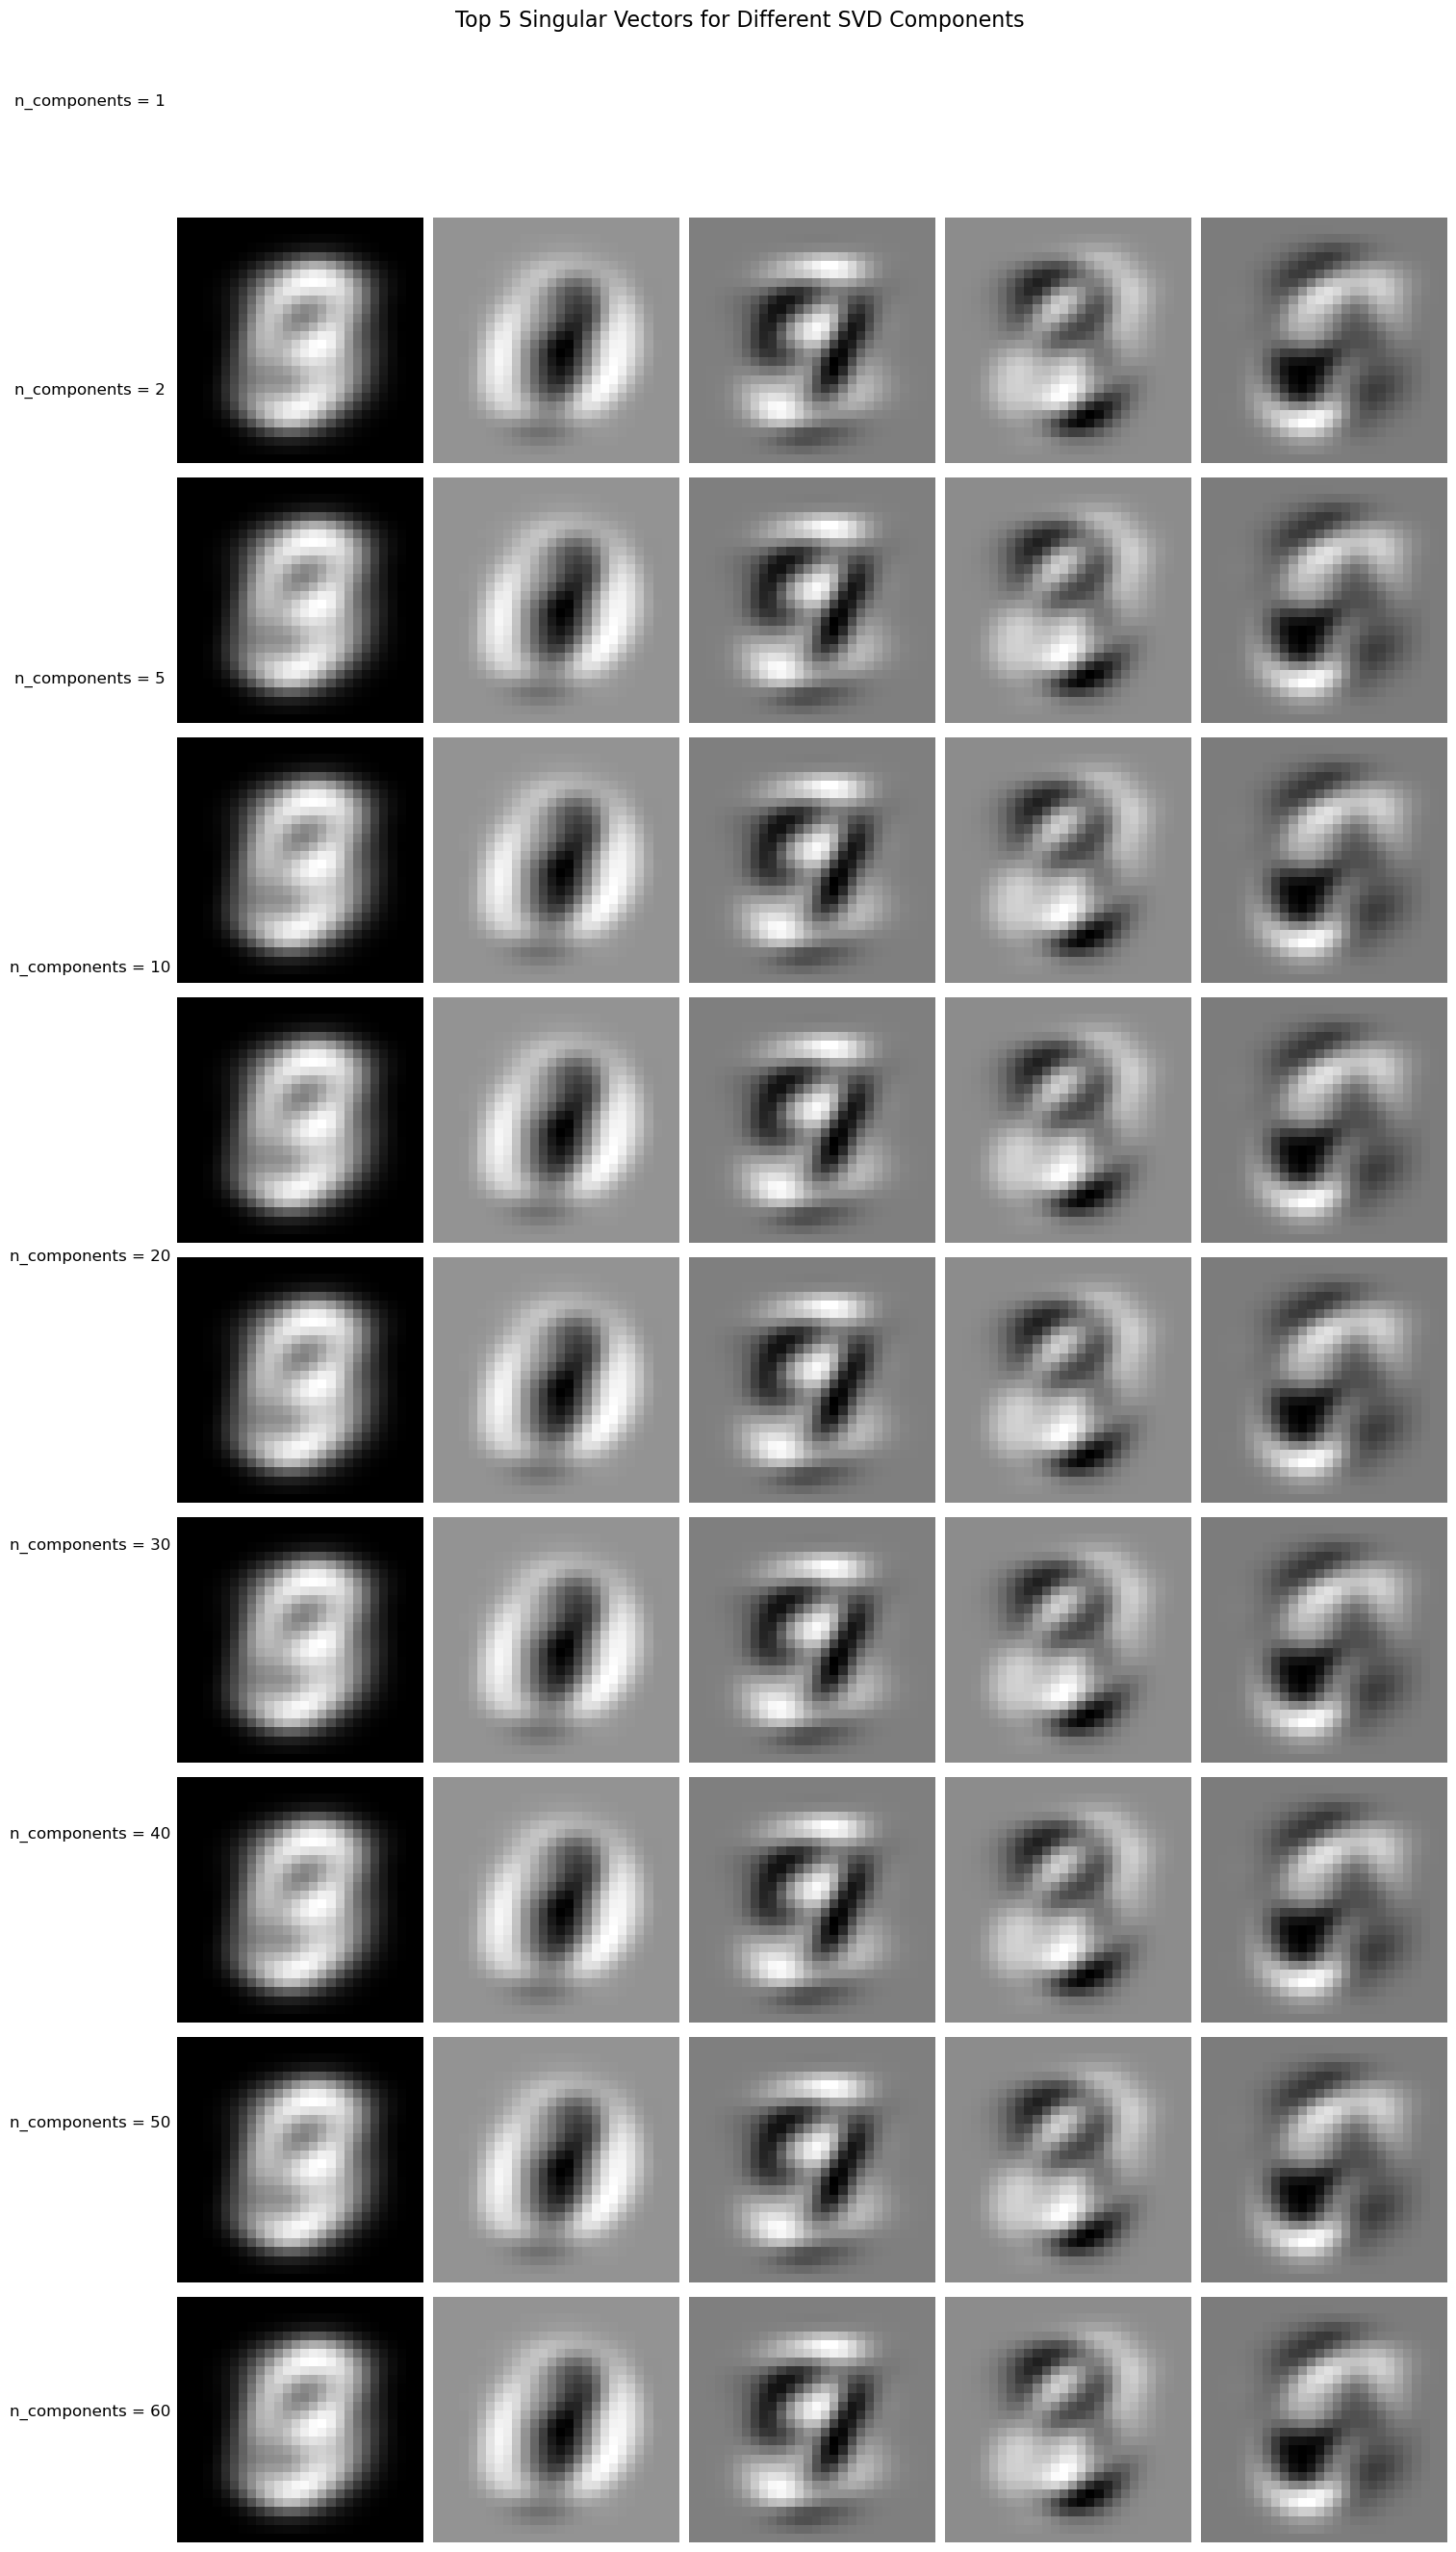

In [6]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of SVD Components')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(svd_components, accuracies, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Training Time (s)', color=color)
ax2.plot(svd_components, training_times, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Accuracy and Training Time vs. Number of SVD Components')
plt.show()


num_rows = len(svd_components)
num_vectors_to_plot=5
fig2, axes = plt.subplots(num_rows, num_vectors_to_plot, figsize=(num_vectors_to_plot*3,num_rows*3))
axes = np.atleast_2d(axes)
for row, n_components in enumerate(svd_components):
  Vt = Vt_dict[n_components]
  for col in range(num_vectors_to_plot):
    singular_vector = Vt[col,:].reshape(28,28)
    ax = axes[row, col]
    ax.imshow(singular_vector, cmap='gray')
    # ax.set_title(f"Singular Vector {i+1}")
    ax.axis('off')
    # if col == 0:
    #   ax.set_ylabel(f"n = {n_components}", size=14)
  # axes[row,0].set_ylabel(f"n= {n_components}", size=14, labelpad=10)
  fig2.text(0.05, (num_rows - row - 0.5) / num_rows, f"n_components = {n_components}", va='center', ha='center', size=12)


plt.suptitle(f"Top {num_vectors_to_plot} Singular Vectors for Different SVD Components", size=16)
plt.tight_layout(rect=[0.1, 0, 1, 0.95])  # Adjust layout, leave space for the row labels
plt.subplots_adjust(top=0.9)
plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER:

From the analysis of the accuracy and training time with different numbers of SVD components, we observe a trade-off between model performance and computational efficiency. Accuracy improves as we increase the number of components; there are significant jumps between smaller component sizes, but the accuracy levels off beyond 20 components. This suggests that while adding more components captures more variance in the data, as the number of components increases beyond a certain point, there are diminishing returns.

The training time similarly increases with the number of components, but the increase is relatively manageable up to around 20 components, after which the computational load becomes more noticeable. Therefore, choosing an optimal number of components requires balancing accuracy improvements with the additional computational cost.

When visually inspecting the singular vectors, no significant differences were discernible between the rows corresponding to different numbers of components. The top 5 singular vectors appear similar across all component sizes, suggesting that the most dominant patterns in the data are captured by the same few singular vectors, regardless of how many components are retained. These vectors likely represent the most significant global features in the MNIST dataset, such as the broad outlines of the digits. This consistency in singular vectors aligns with the fact that the first few singular values capture most of the variance in the data, and increasing the number of components mainly introduces finer details that do not drastically affect these dominant patterns.

Based on both accuracy, time performance, and the visual quality of the singular vectors, 20 components appears to offer the best balance between capturing enough detail for high classification accuracy while maintaining reasonable computational efficiency. Beyond 20 components, the performance improvements are minimal, making 20 an ideal choice for dimensionality reduction for this data set.